# CO<sub>2</sub> emissions
_by Virginia Herrero_

## Data loading
Load the CSV file **co2-emissions-dataset** as a pandas DataFrame.

In [117]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
# Load the dataset
carbon_emission = pd.read_csv("co2-emissions-dataset.csv")
carbon_emission.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning
Clean and pre-process the dataset before it undergoes further analysis.

In [119]:
carbon_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

* **Remove unnecessary columns**

All columns or features that are not necessary for this analysis are dropped from the dataset.

In [120]:
carbon_emission.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [121]:
# Select the columns to drop
columns_to_drop = ["iso_code", "cement_co2_per_capita", "co2_growth_prct", "co2_including_luc_growth_prct", "co2_including_luc", 
                   "co2_including_luc_growth_abs", "co2_including_luc_per_capita", "co2_including_luc_per_gdp", "co2_including_luc_per_unit_energy",
                   "co2_per_capita", "co2_per_unit_energy", "coal_co2_per_capita", "consumption_co2", "consumption_co2_per_capita", "consumption_co2_per_gdp",
                   "cumulative_cement_co2", "cumulative_co2", "cumulative_co2_including_luc", "cumulative_coal_co2", "cumulative_flaring_co2",
                   "cumulative_gas_co2", "cumulative_luc_co2", "cumulative_oil_co2", "cumulative_other_co2", "energy_per_capita", "energy_per_gdp",
                   "flaring_co2_per_capita", "gas_co2_per_capita", "ghg_excluding_lucf_per_capita", "ghg_per_capita", "land_use_change_co2_per_capita",
                   "methane", "methane_per_capita", "nitrous_oxide", "nitrous_oxide_per_capita", "oil_co2_per_capita", "other_co2_per_capita",
                   "primary_energy_consumption", "share_global_cement_co2", "share_global_co2", "share_global_co2_including_luc", "share_global_coal_co2", 
                   "share_global_cumulative_cement_co2", "share_global_cumulative_co2", "share_global_cumulative_co2_including_luc", "share_global_cumulative_coal_co2",
                   "share_global_cumulative_flaring_co2", "share_global_cumulative_gas_co2", "share_global_cumulative_luc_co2", "share_global_cumulative_oil_co2", 
                   "share_global_cumulative_other_co2", "share_global_flaring_co2", "share_global_gas_co2", "share_global_luc_co2", "share_global_oil_co2", 
                   "share_global_other_co2","total_ghg", "total_ghg_excluding_lucf", "trade_co2", "trade_co2_share", "co2_growth_abs", "co2_per_gdp"]

In [122]:
carbon_emission = carbon_emission.drop(columns_to_drop, axis = 1)

In [123]:
carbon_emission.columns

Index(['country', 'year', 'population', 'gdp', 'cement_co2', 'co2', 'coal_co2',
       'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2',
       'other_industry_co2'],
      dtype='object')

In [124]:
carbon_emission.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,2.931,NaN,NaN
1,Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,2.968,NaN,NaN
2,Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,2.968,NaN,NaN
3,Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,3.004,NaN,NaN
4,Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,3.004,NaN,NaN


* **Rename columns**

Some column names are renamed to improve readabily and comprehension of the dataset.

In [125]:
carbon_emission = carbon_emission.rename(columns = {"co2" : "total_co2"})

In [126]:
carbon_emission.head()

,country,year,population,gdp,cement_co2,total_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,2.931,NaN,NaN
1,Afghanistan,1851,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,2.968,NaN,NaN
2,Afghanistan,1852,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,2.968,NaN,NaN
3,Afghanistan,1853,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,3.004,NaN,NaN
4,Afghanistan,1854,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,3.004,NaN,NaN


* **Filter data from the last 50 years**

This study focuses on carbon dioxide emissions over the last 50 years, so the dataset will be filtered to obtain only data from 1971 to 2021.

In [127]:
# Select the first year of the dataset
carbon_emission.year.min()

np.int64(1750)

In [128]:
# Filter the dataset by year and reset the index
carbon_emission = carbon_emission[(carbon_emission["year"] >= 1971)].reset_index(drop = True)

In [129]:
carbon_emission.head()

,country,year,population,gdp,cement_co2,total_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,Afghanistan,1971,11015853.0,1.577051e+10,0.043,1.894,0.359,0.304,0.440,6.265,0.747,NaN
1,Afghanistan,1972,11286753.0,1.317055e+10,0.046,1.530,0.191,0.366,0.300,6.046,0.627,NaN
2,Afghanistan,1973,11575308.0,1.356863e+10,0.067,1.635,0.311,0.223,0.333,4.983,0.702,NaN
3,Afghanistan,1974,11869881.0,1.430911e+10,0.070,1.913,0.305,0.367,0.400,4.617,0.771,NaN
4,Afghanistan,1975,12157390.0,1.517777e+10,0.069,2.121,0.399,0.304,0.475,4.140,0.874,NaN


* **Data types**

Verify that all columns or features have the correct data type.

In [130]:
carbon_emission.dtypes

country                 object
year                     int64
population             float64
gdp                    float64
cement_co2             float64
total_co2              float64
coal_co2               float64
flaring_co2            float64
gas_co2                float64
land_use_change_co2    float64
oil_co2                float64
other_industry_co2     float64
dtype: object

The “year” column is of integer type instead of datetime. However, since only the year is needed, not the full date, the data type will remain integer.

* **Null values**

Remove missing values, zero values, or NaN values from the dataset.

A quick glance at the descriptive statistics of the dataset indicates that 25% of the values of 5 features are zero, and 50% of the values in the flaring_co2 column are zero. 

In [131]:
carbon_emission.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13193.0,1.996076e+03,1.471396e+01,1.971000e+03,1.983000e+03,1.996000e+03,2.009000e+03,2.021000e+03
population,12106.0,9.789166e+07,5.093085e+08,1.833000e+03,4.383258e+05,4.798528e+06,1.871719e+07,7.909295e+09
gdp,7780.0,4.231507e+11,2.840284e+12,1.120380e+08,1.307095e+10,4.261061e+10,2.004345e+11,1.136302e+14
cement_co2,11635.0,1.610971e+01,9.100006e+01,0.000000e+00,0.000000e+00,3.090000e-01,2.317000e+00,1.672592e+03
total_co2,12419.0,7.130162e+02,2.698844e+03,0.000000e+00,9.135000e-01,9.687000e+00,1.050105e+02,3.712385e+04
coal_co2,11747.0,1.995345e+02,9.958156e+02,0.000000e+00,0.000000e+00,1.210000e-01,1.188000e+01,1.505151e+04
flaring_co2,11747.0,6.401901e+00,2.792217e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.555000e-01,4.392540e+02
gas_co2,11747.0,9.719472e+01,4.398783e+02,0.000000e+00,0.000000e+00,2.900000e-02,1.158850e+01,7.921830e+03
land_use_change_co2,11679.0,1.125068e+02,4.970239e+02,-3.238610e+02,0.000000e+00,1.319000e+00,1.934600e+01,7.104862e+03
oil_co2,11798.0,1.977634e+02,8.697925e+02,0.000000e+00,6.717500e-01,4.314500e+00,3.343125e+01,1.234565e+04


In [132]:
# Check the total of null values in each column
carbon_emission.isnull().sum()

country                    0
year                       0
population              1087
gdp                     5413
cement_co2              1558
total_co2                774
coal_co2                1446
flaring_co2             1446
gas_co2                 1446
land_use_change_co2     1514
oil_co2                 1395
other_industry_co2     11108
dtype: int64

To deal with these null values, interpolation will be used. This method is chosen because it allows the time series of the data frame to be maintained by imputing interpolated values from the dataset.

In [133]:
# Replace all nan values into null values
carbon_emission = carbon_emission.replace(np.nan, 0)

In [134]:
# Interpolate all the null values
carbon_emission = carbon_emission.infer_objects(copy = False)

In [135]:
# Check for null values after interpolation
carbon_emission.isnull().sum()

country                0
year                   0
population             0
gdp                    0
cement_co2             0
total_co2              0
coal_co2               0
flaring_co2            0
gas_co2                0
land_use_change_co2    0
oil_co2                0
other_industry_co2     0
dtype: int64

In [136]:
carbon_emission.head()

,country,year,population,gdp,cement_co2,total_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,Afghanistan,1971,11015853.0,1.577051e+10,0.043,1.894,0.359,0.304,0.440,6.265,0.747,0.0
1,Afghanistan,1972,11286753.0,1.317055e+10,0.046,1.530,0.191,0.366,0.300,6.046,0.627,0.0
2,Afghanistan,1973,11575308.0,1.356863e+10,0.067,1.635,0.311,0.223,0.333,4.983,0.702,0.0
3,Afghanistan,1974,11869881.0,1.430911e+10,0.070,1.913,0.305,0.367,0.400,4.617,0.771,0.0
4,Afghanistan,1975,12157390.0,1.517777e+10,0.069,2.121,0.399,0.304,0.475,4.140,0.874,0.0


* **Duplicated values**

Check if there are any duplicated data in the dataset.

In [137]:
carbon_emission.duplicated().sum()

np.int64(0)

* **Create a new DataFrame with continent information**

Data from continents and countries are mixed in the “country” column. Therefore, to extract information on emissions from the different continents, a new data frame is created with data from each continent.

In [138]:
continents = ["Africa", "Antarctica", "Asia", "Europe", "North America", "Oceania", "South America"]
emissions_continents = carbon_emission.loc[carbon_emission.country.isin(continents)]
emissions_continents = emissions_continents.drop(columns = ["gdp"])
emissions_continents = emissions_continents.rename(columns = {"country" : "continent"})

emissions_continents.head()

,continent,year,population,cement_co2,total_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
51,Africa,1971,375086296.0,9.243,332.204,149.906,55.976,1.693,959.162,115.386,0.0
52,Africa,1972,384930776.0,9.762,352.239,153.924,64.650,4.414,1141.446,119.489,0.0
53,Africa,1973,395212420.0,10.328,378.421,154.291,80.006,5.360,900.868,128.435,0.0
54,Africa,1974,406069208.0,10.803,388.865,157.241,81.362,5.111,891.341,134.347,0.0
55,Africa,1975,417556976.0,10.928,387.829,162.187,64.309,6.422,884.893,143.982,0.0


In [139]:
emissions_continents.describe().T

,count,mean,std,min,25%,50%,75%,max
year,327.0,1.996064e+03,1.434561e+01,1971.000,1.984000e+03,1.996000e+03,2.008000e+03,2.021000e+03
population,327.0,9.070405e+08,1.190509e+09,0.000,2.444977e+08,4.923192e+08,7.439085e+08,4.693332e+09
cement_co2,327.0,1.247931e+02,2.458153e+02,0.000,1.315750e+01,4.840100e+01,1.151990e+02,1.358534e+03
total_co2,327.0,3.898526e+03,4.460648e+03,0.004,4.576025e+02,1.251306e+03,6.428630e+03,2.168899e+04
coal_co2,327.0,1.558270e+03,2.305254e+03,0.000,1.251180e+02,4.237800e+02,2.040023e+03,1.195901e+04
flaring_co2,327.0,4.863087e+01,4.228868e+01,0.000,1.816650e+01,4.051400e+01,6.913000e+01,2.303750e+02
gas_co2,327.0,7.038774e+02,7.849246e+02,0.000,6.404900e+01,2.390980e+02,1.358621e+03,3.242854e+03
land_use_change_co2,327.0,9.832504e+02,9.661938e+02,-323.861,1.391950e+02,7.241160e+02,1.716382e+03,4.117860e+03
oil_co2,327.0,1.435097e+03,1.353463e+03,0.004,2.063435e+02,6.074600e+02,2.760164e+03,4.806574e+03
other_industry_co2,327.0,2.785869e+01,4.563874e+01,0.000,0.000000e+00,4.647000e+00,3.426750e+01,2.060510e+02


* **Drop unnecessary countries**

The country column contains countries and areas that are not of interest for this analysis. Therefore, they will be removed from the dataset.

In [140]:
carbon_emission.country.unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

In [141]:
# Select countries to drop
countries_to_drop = ["Africa", "Africa (GCP)", "Asia", "Asia (GCP)", "Asia (excl. China and India)", "Central America (GCP)", "Europe", "Europe (GCP)", 
                     "Europe (excl. EU-27)", "Europe (excl. EU-28)","European Union (27)", "European Union (27) (GCP)", "European Union (28)",
                     "High-income countries", "International transport", "Kuwaiti Oil Fires (GCP)", "Low-income countries", "Lower-middle-income countries", 
                     "Middle East (GCP)", "Non-OECD (GCP)", "North America", "North America (GCP)", "North America (excl. USA)", "OECD (GCP)", "Oceania", 
                     "Oceania (GCP)", "Panama Canal Zone (GCP)", "Ryukyu Islands (GCP)", "South America", "South America (GCP)", "Upper-middle-income countries", "World"]

In [142]:
# Find the row index of each country and drop them from the DataFrame
for country in countries_to_drop:
    row_index = carbon_emission.index[carbon_emission["country"] == country].to_list()
    carbon_emission = carbon_emission.drop(row_index)

In [143]:
# Check that the countries have been sucessfully dropped
carbon_emission.shape

(11702, 12)

**The clean dataset**

In [144]:
carbon_emission.head()

,country,year,population,gdp,cement_co2,total_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,Afghanistan,1971,11015853.0,1.577051e+10,0.043,1.894,0.359,0.304,0.440,6.265,0.747,0.0
1,Afghanistan,1972,11286753.0,1.317055e+10,0.046,1.530,0.191,0.366,0.300,6.046,0.627,0.0
2,Afghanistan,1973,11575308.0,1.356863e+10,0.067,1.635,0.311,0.223,0.333,4.983,0.702,0.0
3,Afghanistan,1974,11869881.0,1.430911e+10,0.070,1.913,0.305,0.367,0.400,4.617,0.771,0.0
4,Afghanistan,1975,12157390.0,1.517777e+10,0.069,2.121,0.399,0.304,0.475,4.140,0.874,0.0


## Data analysis

In this section, an in-depth data exploratory analysis is carried out.

### **Distribution of carbon emissions by year**

In [145]:
emissions_by_year = carbon_emission.groupby("year")["total_co2"].sum()

Text(0.5, 1.0, 'Distribution of CO$_2$ Emissions Over the Last 50 Years')

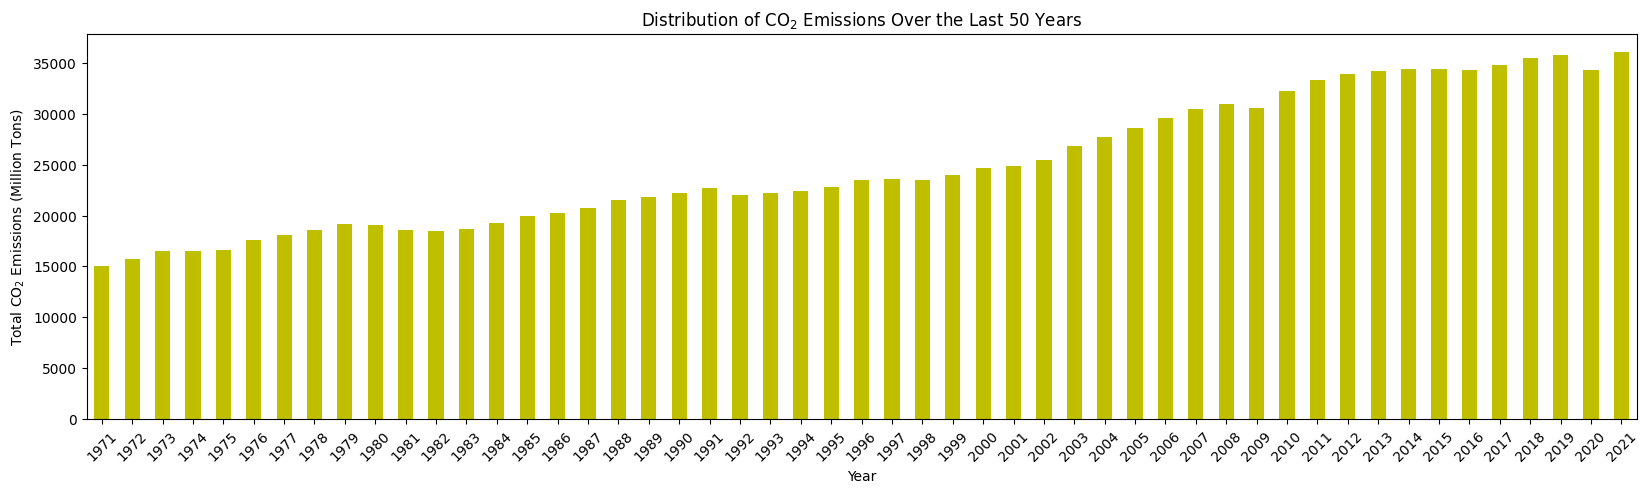

In [203]:
emissions_by_year.plot(kind = "bar", figsize = (20, 5), color = "y")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Distribution of CO$_2$ Emissions Over the Last 50 Years", size = 12)

Carbon dioxide emissions over the last 50 years have been increasing. The year with the most carbon emissions was 2021. 

In 2020, carbon dioxide emissions were lower than in previous years. In 2020, the Coronavirus pandemic occurred. There was a global stillness that contributed positively to carbon dioxide emissions. 

In 2009, emissions were also lower than in the previous year. This can be explained by the global financial recession in 2008, which probably also affected carbon emissions.

### **Distribution of carbon emissions by continent**

In [147]:
emissions_by_continent = emissions_continents.groupby("continent")["total_co2"].sum()

In [148]:
emissions_by_continent = emissions_by_continent.to_frame().sort_values(by = "total_co2", ascending = False).reset_index()
emissions_by_continent

,continent,total_co2
0,Asia,518759.310
1,Europe,338730.194
2,North America,317450.139
3,Africa,43897.417
4,South America,38379.939
5,Oceania,17600.933
6,Antarctica,0.157


Text(0.5, 1.0, 'CO$_2$ Emission Distribution by Continent in the Last 50 Years')

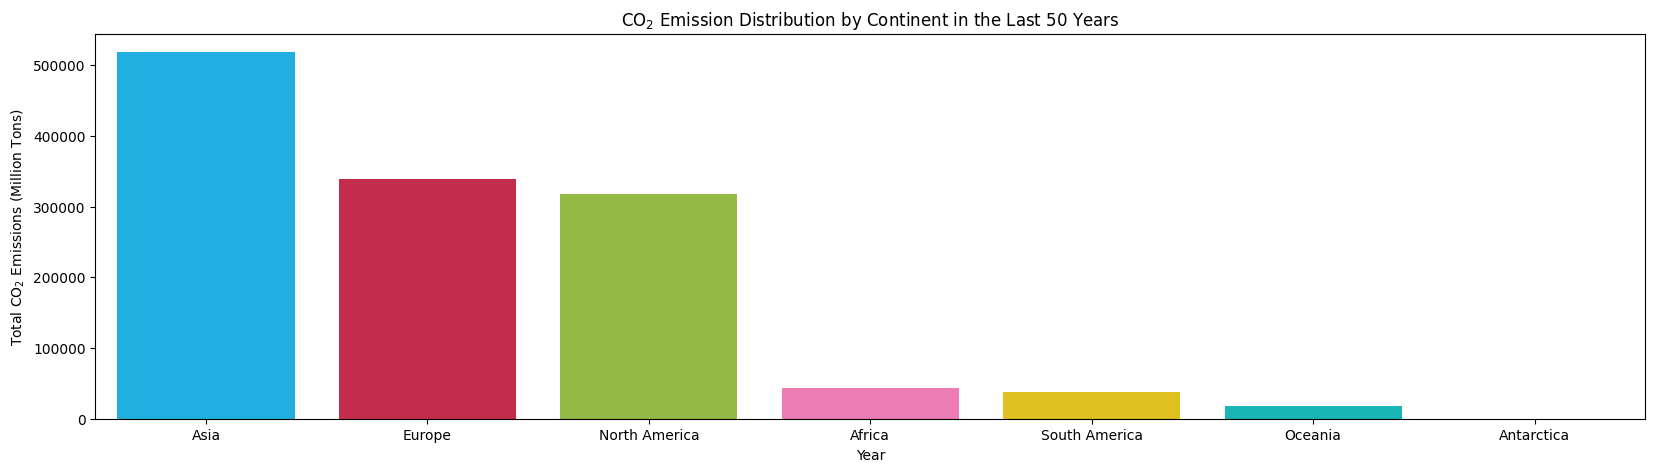

In [199]:
distribution_emissions_continent_graph = plt.figure(figsize = (20, 5))
sns.barplot(emissions_by_continent, x = "continent", y = "total_co2", errorbar = None, hue = "continent",
            palette = ["deepskyblue", "crimson", "yellowgreen", "hotpink", "gold", "darkturquoise", "mediumorchid"])
plt.xlabel("Year")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("CO$_2$ Emission Distribution by Continent in the Last 50 Years", size = 12)

The continent that has produced the most carbon emissions in the last 50 years is Asia, followed by Europe and North America. It is also worth noting that Antarctica has hardly any carbon emissions, as it was expected.

### **Evolution of carbon emissions by continent**

Text(0.5, 1.0, 'Evolution of CO$_2$ Emission by Continent in The Last 50 Years')

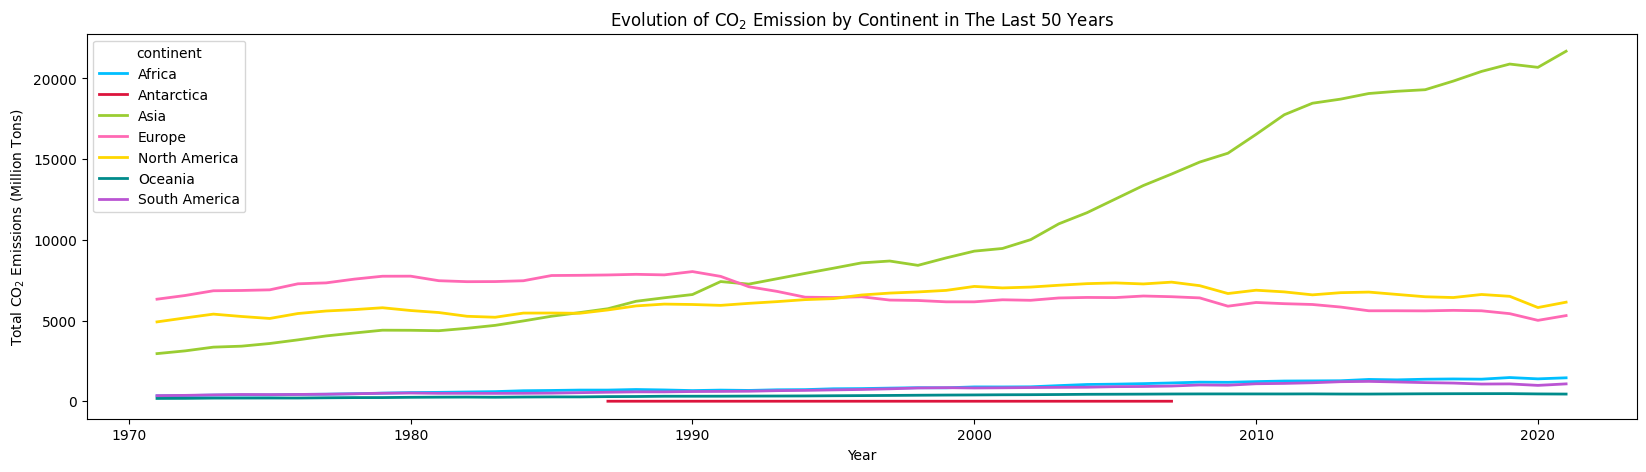

In [205]:
evolution_emissions_continent_graph = plt.figure(figsize = (20, 5))
sns.lineplot(emissions_continents, x = "year", y = "total_co2", hue = "continent", linewidth = 2,
             palette = ["deepskyblue", "crimson", "yellowgreen", "hotpink", "gold", "darkcyan", "mediumorchid"])
plt.xlabel("Year")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Evolution of CO$_2$ Emission by Continent in The Last 50 Years", size = 12)

The graph above shows the evolution of carbon dioxide emissions by continent over the last 50 years. Asia has increased its emissions considerably since 1990, while Europe has decreased its emissions below those of North America. North America has maintained its emissions stable over the last 50 years. It is worth noting that Africa and South America have hardly any emissions. 

It is clear that Asia is the continent that produces the most carbon emissions. Asian countries have dramatically increased their emissions since 1990. This graph also explains why Europe has polluted more than North America over the last 50 years. While North America maintained the same emissions trend, Europe has reduced its emissions since 1990.

### **World's largest carbon dioxide emitters**

In [151]:
top_emitters = carbon_emission.groupby("country")["total_co2"].sum()
top_emitters = top_emitters.to_frame().sort_values("total_co2", ascending = False).reset_index()[0:10]
top_emitters

,country,total_co2
0,United States,267582.282
1,China,238482.407
2,Russia,92473.851
3,Japan,56417.577
4,India,52732.660
5,Germany,47492.025
6,United Kingdom,27660.742
7,Canada,25268.412
8,Ukraine,22835.249
9,France,20887.066


Text(0.5, 1.0, "World's Largest CO$_2$ Emitters in the Last 50 Years")

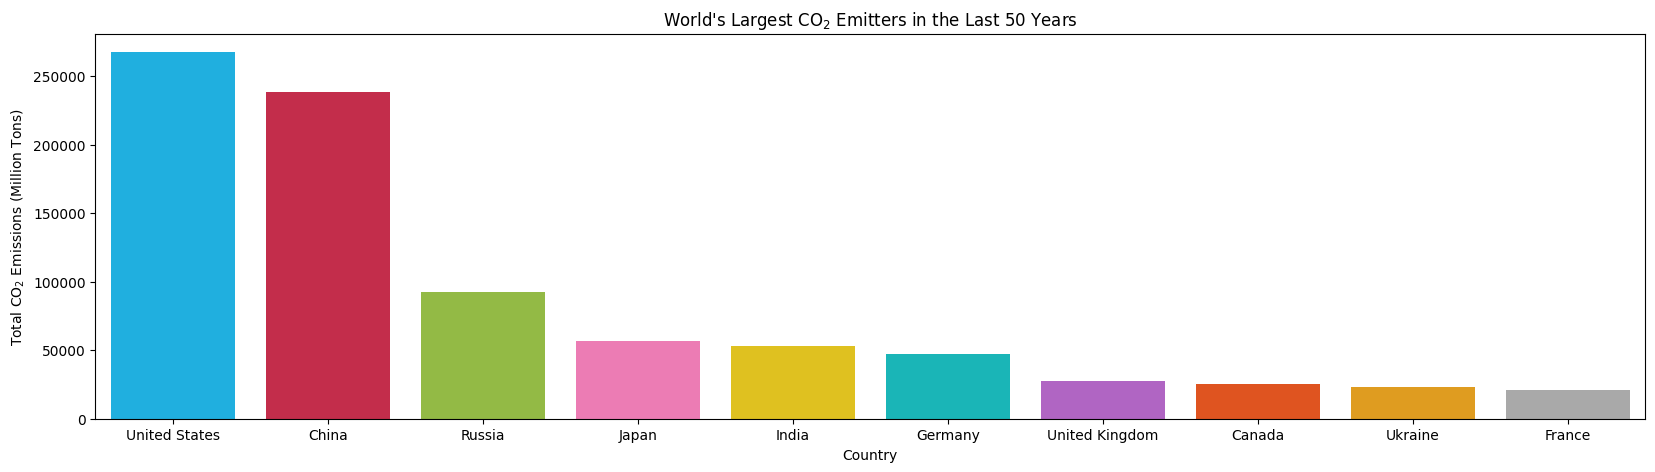

In [207]:
top_emitters_graph = plt.figure(figsize = (20, 5))
sns.barplot(top_emitters, x = "country", y = "total_co2", errorbar = None, hue = "country",
            palette = ["deepskyblue", "crimson", "yellowgreen", "hotpink", "gold", "darkturquoise", "mediumorchid", "orangered", "orange", "darkgrey" ])
plt.xlabel("Country")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("World's Largest CO$_2$ Emitters in the Last 50 Years", size = 12)

* **United States: evolution of carbon dioxide emissions**

The United States is the largest carbon dioxide emitter in the world in the last 50 years. Let's take a look at the evolution of its emissions over this time period.

In [153]:
united_states = carbon_emission[carbon_emission["country"] == "United States"].reset_index(drop = True)

Text(0.5, 1.0, 'Evolution of U.S. CO$_2$ Emission Over the Last 50 Years')

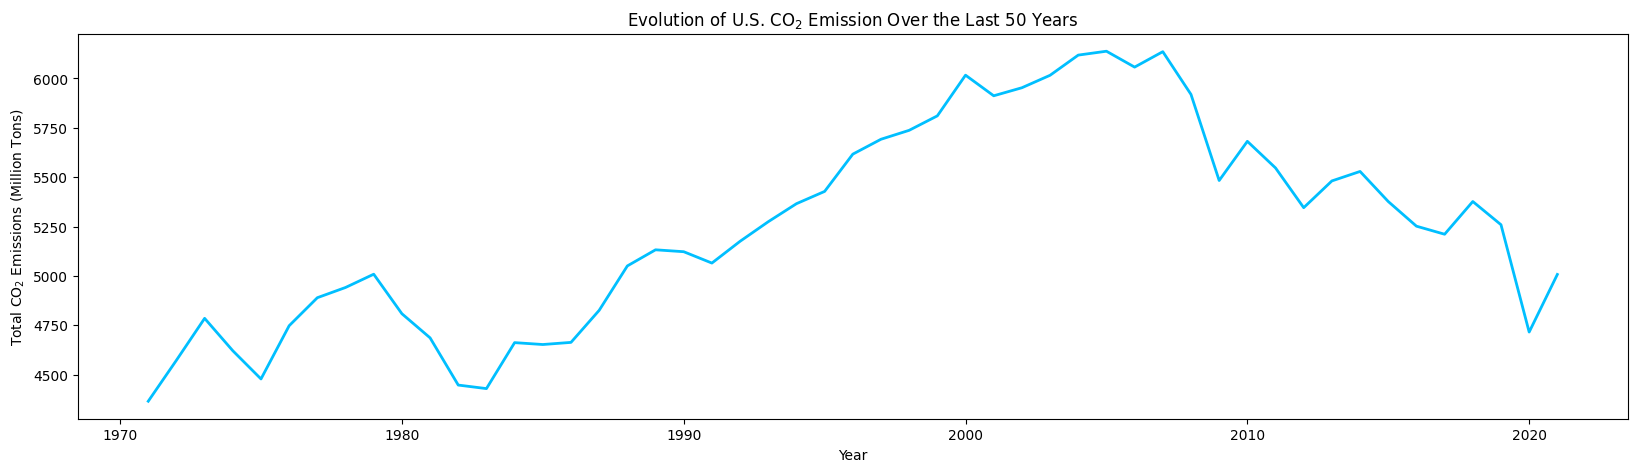

In [208]:
us_emissions_evolution_graph = plt.figure(figsize = (20, 5))
sns.lineplot(united_states, x = "year", y = "total_co2", linewidth = 2, color = "deepskyblue" )
plt.xlabel("Year")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Evolution of U.S. CO$_2$ Emission Over the Last 50 Years", size = 12)

U.S. carbon dioxide emissions dropped in 1983 and continued to grow thereafter until peaking in 2008. After 2008, U.S. carbon dioxide emissions have been decreasing.

* **China: evolution of carbon dioxide emissions**

China is the second largest carbon dioxide emitter in the world in the last 50 years. Let's take a look at the evolution of its emissions over this time period.

In [155]:
china = carbon_emission[carbon_emission["country"] == "China"].reset_index(drop = True)

Text(0.5, 1.0, "Evolution of China's CO$_2$ Emission Over the Last 50 Years")

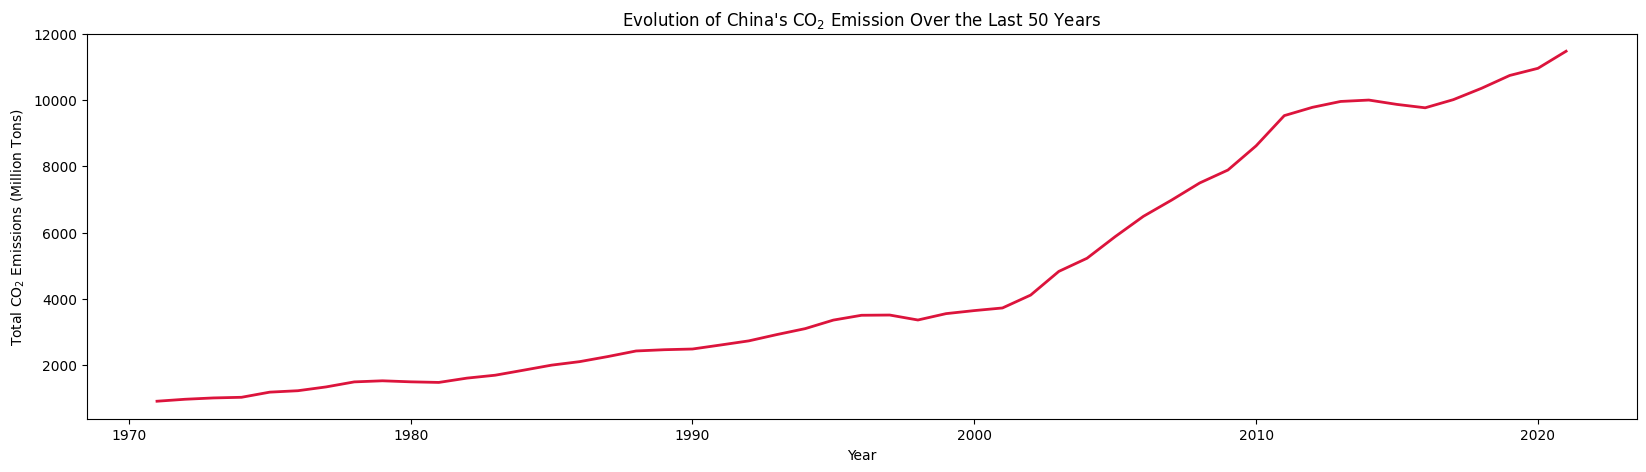

In [209]:
china_emissions_evolution_graph = plt.figure(figsize = (20, 5))
sns.lineplot(china, x = "year", y = "total_co2", linewidth = 2, color = "crimson" )
plt.xlabel("Year")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Evolution of China's CO$_2$ Emission Over the Last 50 Years", size = 12)

China's carbon dioxide emissions have increased since 1990, however the growth has been extremely significant since 2000. 

* **Germany: evolution of carbon dioxide emissions**

Let's take a look at the evolution of Germany's emissions over the last 50 years.

In [157]:
germany = carbon_emission[carbon_emission["country"] == "Germany"].reset_index(drop = True)

Text(0.5, 1.0, "Evolution of Germany's CO$_2$ Emission Over the Last 50 Years")

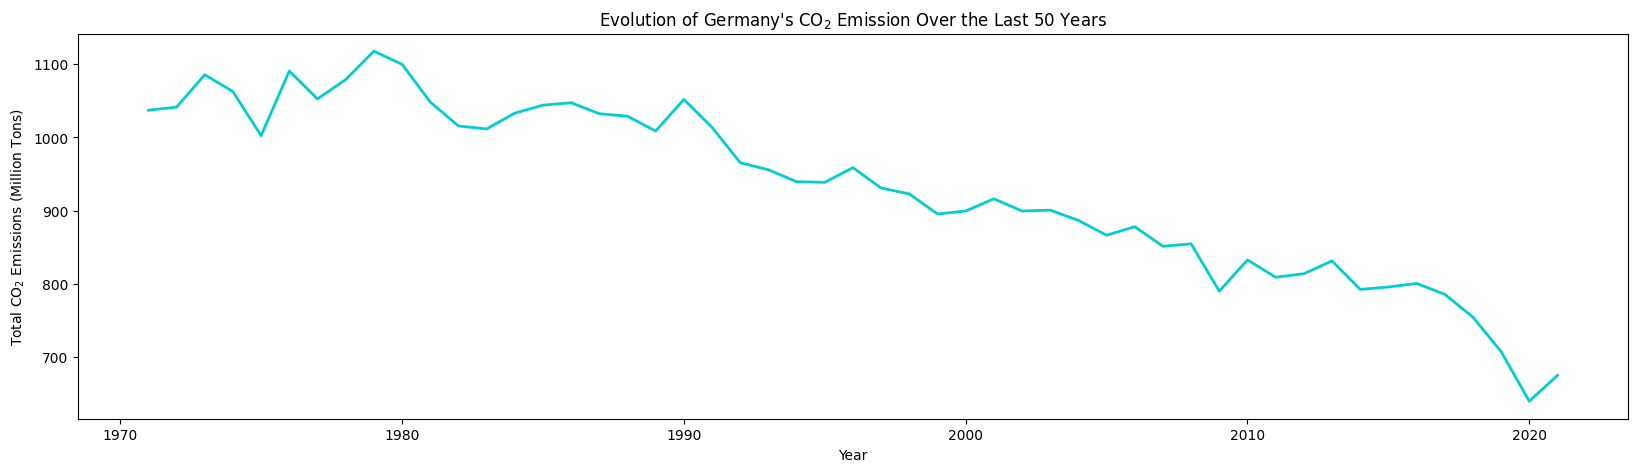

In [210]:
germany_emissions_evolution_graph = plt.figure(figsize = (20, 5))
sns.lineplot(germany, x = "year", y = "total_co2", linewidth = 2, color = "darkturquoise" )
plt.xlabel("Year")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Evolution of Germany's CO$_2$ Emission Over the Last 50 Years", size = 12)

Germany's emissions have been slowly decreasing since 1990. They reached the lowest peak emissions in 2020, which was the year of the coronavirus pandemic in which German industry was paralyzed for almost a year. 

These data show the reality of the commitment of the European Union and the German administration to emissions reduction, global warming, pollution and environmental policies.

### **Carbon emissions sources**

Carbon dioxide is found naturally in the atmosphere as part of the Earth's carbon cycle, however some human activities such as the burning of oil, coal and gas, as well as deforestation, are the main cause of increasing carbon dioxide concentrations in the atmosphere. This section explores the impact of each source of carbon dioxide emissions on total emissions.

* **Evolution of carbon emission sources over the years**

In [159]:
sources = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2", "land_use_change_co2"]

carbon_sources_evolution= pd.DataFrame()

for i in sources:
    source = carbon_emission.groupby("year")[i].sum().reset_index()
    carbon_sources_evolution = pd.concat([carbon_sources_evolution, source], axis = 1)

In [160]:
carbon_sources_evolution = carbon_sources_evolution.iloc[:, [0,1,3,5,7,9,11,13]]

Text(0.5, 1.0, 'Evolution of CO$_2$ Emission by Sources Over the Last 50 Years')

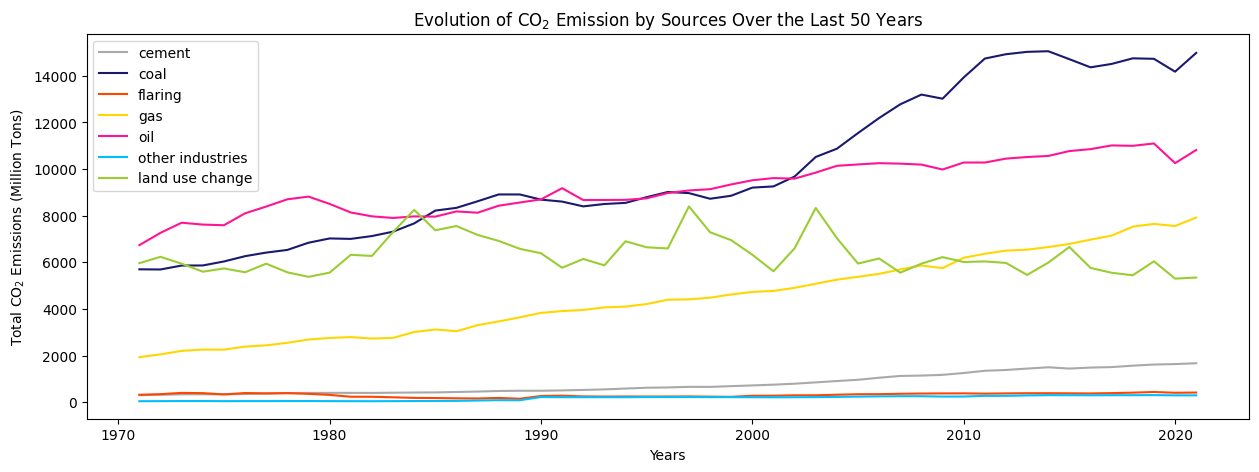

In [161]:
evolution_emission_sources_graph = plt.figure(figsize = (15, 5))
sns.lineplot(carbon_sources_evolution, x = "year", y = "cement_co2", label = "cement", color = "darkgrey")
sns.lineplot(carbon_sources_evolution, x = "year", y = "coal_co2", label = "coal", color = "midnightblue")
sns.lineplot(carbon_sources_evolution, x = "year", y = "flaring_co2", label = "flaring", color = "orangered")
sns.lineplot(carbon_sources_evolution, x = "year", y = "gas_co2", label = "gas", color = "gold")
sns.lineplot(carbon_sources_evolution, x = "year", y = "oil_co2", label = "oil", color = "deeppink")
sns.lineplot(carbon_sources_evolution, x = "year", y = "other_industry_co2", label = "other industries", color = "deepskyblue")
sns.lineplot(carbon_sources_evolution, x = "year", y = "land_use_change_co2", label = "land use change", color = "yellowgreen")
plt.xlabel("Years")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Evolution of CO$_2$ Emission by Sources Over the Last 50 Years", size = 12)

The largest source of carbon dioxide emissions is coal. Carbon dioxide emissions from coal have been increasing over the past 50 years, although the growth has been most notable since 2000. This coincides with the increase in total carbon dioxide emissions in China, which probably means that China has been using more coal as fuel since 2000. This will be addressed further later on. 

The second source of carbon dioxide emissions is oil, which has been increasing steadily over the last 50 years.

Gas emissions have increased since 1971 in a linear fashion.

Emissions from land-use change have fluctuated over the last 50 years. Peak emissions from land-use change were reached in 1983, followed by 1997 and 2002.

Carbon emissions from cement have remained almost constant over the last 50 years, with only a small increase observed since 2000.

Emissions from flaring and other industries are almost identical and have a value close to zero.

* **Carbon emission sources by top emitters**

In [162]:
sources = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2", "land_use_change_co2"]

carbon_sources = pd.DataFrame()

for i in sources:
    source = carbon_emission.groupby("country")[i].sum().reset_index()
    carbon_sources = pd.concat([carbon_sources, source], axis = 1)

In [163]:
carbon_sources = carbon_sources.iloc[:, [0,1,3,5,7,9,11,13]]
carbon_sources

,country,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2
0,Afghanistan,1.936,53.599,5.659,19.444,125.172,0.0,83.101
1,Aland Islands,0.000,0.000,0.000,0.000,0.000,0.0,-0.444
2,Albania,23.133,59.725,0.136,15.113,152.619,0.0,77.348
3,Algeria,234.658,89.688,687.099,2140.158,1569.952,0.0,359.290
4,American Samoa,0.000,0.000,0.000,0.000,0.000,0.0,0.406
...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,0.000,0.000,0.000,0.000,0.774,0.0,0.000
230,Western Sahara,0.000,0.000,0.000,0.000,0.000,0.0,0.000
231,Yemen,23.044,4.978,14.862,13.637,532.155,0.0,31.843
232,Zambia,15.229,52.515,0.000,0.000,110.562,0.0,3113.444


**United States: main sources of CO<sub>2</sub> emission**

In [164]:
united_states_sources = carbon_sources[carbon_sources["country"] == "United States"].reset_index(drop = True)
united_states_sources

,country,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2
0,United States,1879.065,85102.503,1743.906,60822.129,116916.557,1118.114,6722.857


Text(0.5, 1.0, 'Distribution of Sources of CO$_2$ Emissions in the United States in the Last 50 Years')

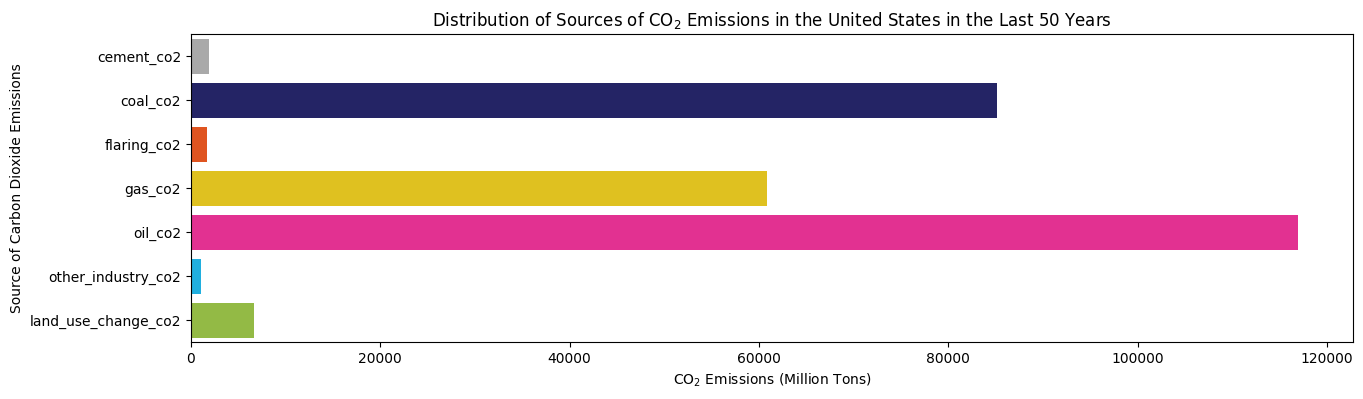

In [165]:
us_sources_emissions_graph = plt.figure(figsize = (15, 4))
sns.barplot(united_states_sources, orient= "h", palette = ["darkgrey", "midnightblue", "orangered", "gold", "deeppink", "deepskyblue", "yellowgreen"])
plt.xlabel("CO$_2$ Emissions (Million Tons)")
plt.ylabel("Source of Carbon Dioxide Emissions")
plt.title("Distribution of Sources of CO$_2$ Emissions in the United States in the Last 50 Years", size = 12)

The largest source of CO<sub>2</sub> emissions in the United States in the last 50 years is oil, followed by coal and gas.

**China: main sources of CO<sub>2</sub> emission**

In [166]:
china_sources = carbon_sources[carbon_sources["country"] == "China"].reset_index(drop = True)
china_sources

,country,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2
0,China,15565.225,177118.951,68.486,7130.394,33965.106,4634.241,36953.86


Text(0.5, 1.0, 'Distribution of Sources of CO$_2$ Emissions in China in the Last 50 Years')

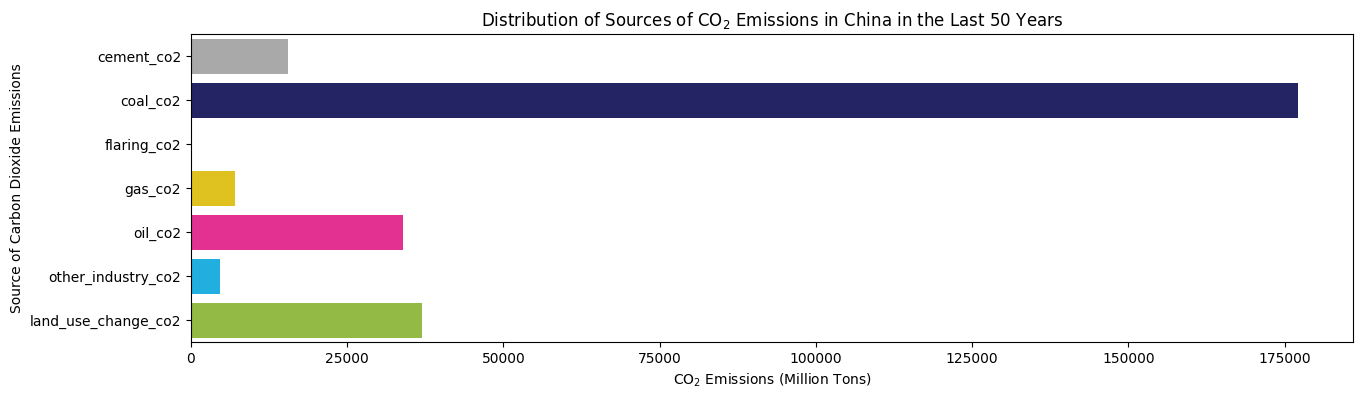

In [167]:
china_sources_emissions_graph = plt.figure(figsize = (15, 4))
sns.barplot(china_sources, orient= "h", palette = ["darkgrey", "midnightblue", "orangered", "gold", "deeppink", "deepskyblue", "yellowgreen"])
plt.xlabel("CO$_2$ Emissions (Million Tons)")
plt.ylabel("Source of Carbon Dioxide Emissions")
plt.title("Distribution of Sources of CO$_2$ Emissions in China in the Last 50 Years", size = 12)

The largest source of carbon dioxide emissions in China over the past 50 years is coal. The second largest source of emissions is land use change. These emissions are due to deforestation, creation of new cities, and other changes in the environment. This is due to China's development in recent years, which can also be seen in the emissions from cement, which are high.

**Germany: main sources of CO<sub>2</sub> emission**

In [168]:
germany_sources = carbon_sources[carbon_sources["country"] == "Germany"].reset_index(drop = True)
germany_sources

,country,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2
0,Germany,822.419,22189.283,93.573,7073.328,17018.92,294.508,-1458.602


Text(0.5, 1.0, 'Distribution of Sources of CO$_2$ Emissions in Germany in the Last 50 Years')

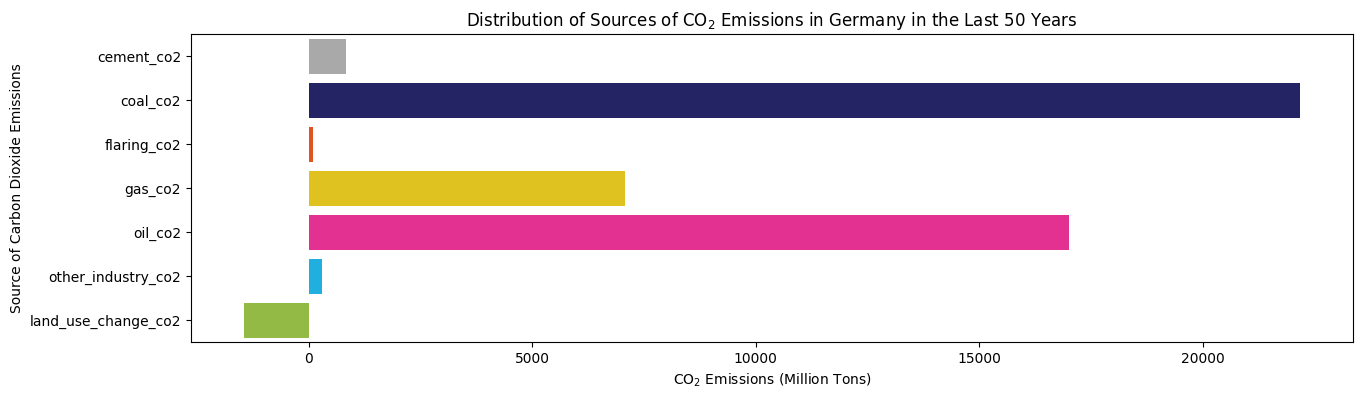

In [169]:
germany_sources_emissions_graph  = plt.figure(figsize = (15, 4))
sns.barplot(germany_sources, orient= "h", palette = ["darkgrey", "midnightblue", "orangered", "gold", "deeppink", "deepskyblue", "yellowgreen"])
plt.xlabel("CO$_2$ Emissions (Million Tons)")
plt.ylabel("Source of Carbon Dioxide Emissions")
plt.title("Distribution of Sources of CO$_2$ Emissions in Germany in the Last 50 Years", size = 12)

The largest source of carbon emissions in Germany comes from coal, followed by oil and gas. It is worth noting that emissions from land use change are negative. This means that land use change has a negative effect on emissions, i.e. it sequesters CO<sub>2</sub>, which means that CO<sub>2</sub> is stored after being captured from industrial facilities or is directly removed from the atmosphere.

### **Emissions from land use change**

Land plays an important role in the global cycles of greenhouse gases such as carbon dioxide. Land use activities can lead to emissions of carbon dioxide into the atmosphere or its removal from the atmosphere. 

This section examines the countries with the highest negative and positive carbon dioxide emissions from land use changes. Positive emissions mean that carbon dioxide is emitted into the atmosphere, while negative emissions mean that carbon dioxide is captured and removed from the atmosphere.

In [170]:
land_use_change_emissions = carbon_sources.groupby("country")["land_use_change_co2"].sum().reset_index()
land_use_change_emissions

,country,land_use_change_co2
0,Afghanistan,83.101
1,Aland Islands,-0.444
2,Albania,77.348
3,Algeria,359.290
4,American Samoa,0.406
...,...,...
229,Wallis and Futuna,0.000
230,Western Sahara,0.000
231,Yemen,31.843
232,Zambia,3113.444


* **Positive land use change emissions**

In [171]:
positive_land_use_change_emissions = land_use_change_emissions.sort_values(by = "land_use_change_co2", ascending = False)[0:10]
positive_land_use_change_emissions

,country,land_use_change_co2
30,Brazil,72181.202
96,Indonesia,39672.290
43,China,36953.860
56,Democratic Republic of Congo,13350.517
172,Russia,10818.656
38,Canada,10237.328
95,India,9427.256
208,Thailand,8165.515
125,Malaysia,7600.384
222,United States,6722.857


Text(0.5, 1.0, 'Countries with Positive Land Change CO$_2$ Emissions in the Last 50 Years')

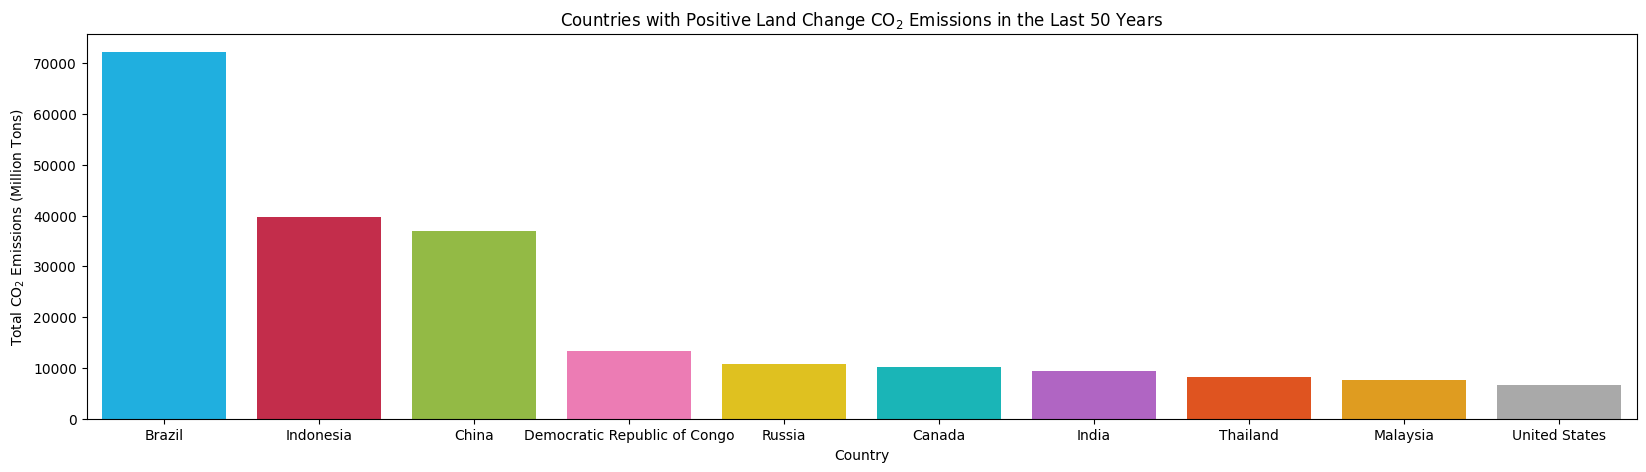

In [211]:
positive_land_use_change_emissions_graph = plt.figure(figsize = (20, 5))
sns.barplot(positive_land_use_change_emissions, x = "country", y = "land_use_change_co2", errorbar = None, hue = "country",
            palette = ["deepskyblue", "crimson", "yellowgreen", "hotpink", "gold", "darkturquoise", "mediumorchid", "orangered", "orange", "darkgrey" ])
plt.xlabel("Country")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Countries with Positive Land Change CO$_2$ Emissions in the Last 50 Years", size = 12)

The countries that emit the most CO<sub>2</sub> into the atmosphere due to land use change are Brazil, Indonesia and China. 

* **Negative land use change emissions**

In [173]:
negative_land_use_change_emissions = land_use_change_emissions.sort_values(by = "land_use_change_co2", ascending = True)[0:10]
negative_land_use_change_emissions

,country,land_use_change_co2
102,Italy,-2523.693
166,Poland,-2169.418
73,France,-1476.555
79,Germany,-1458.602
196,Spain,-810.477
107,Kazakhstan,-689.823
78,Georgia,-494.532
55,Czechia,-398.644
184,Serbia,-385.783
93,Hungary,-314.115


Text(0.5, 1.0, 'Countries with Negative Land Change CO$_2$ Emissions in the Last 50 Years')

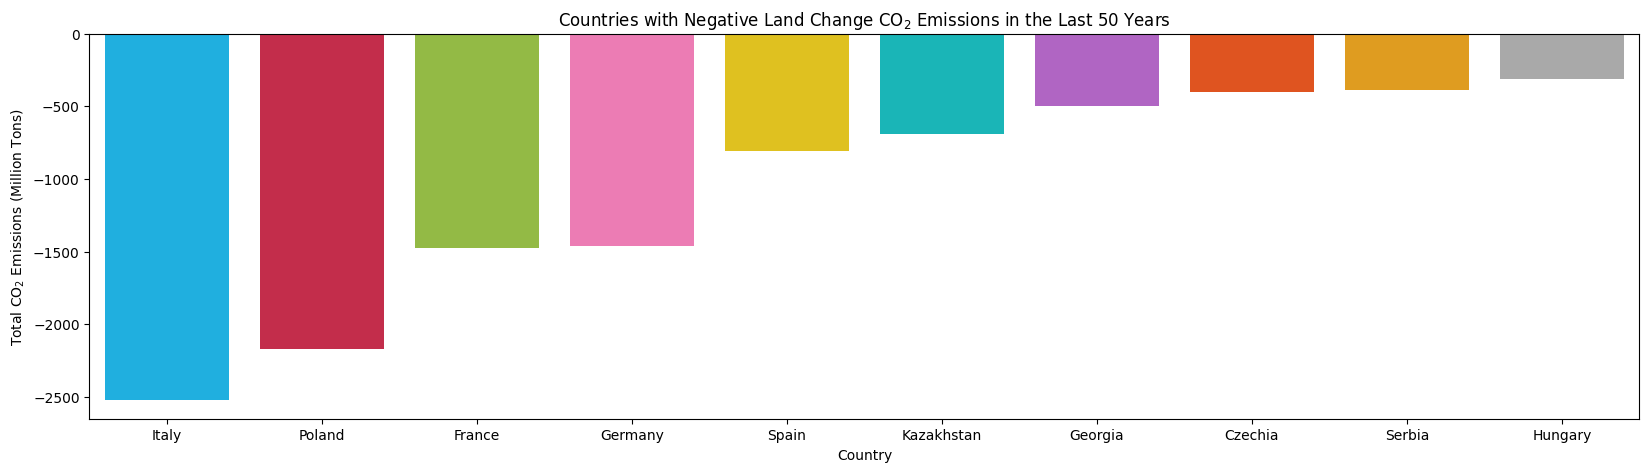

In [212]:
negative_land_use_change_emission_graph = plt.figure(figsize = (20, 5))
sns.barplot(negative_land_use_change_emissions, x = "country", y = "land_use_change_co2", errorbar = None, hue = "country",
            palette = ["deepskyblue", "crimson", "yellowgreen", "hotpink", "gold", "darkturquoise", "mediumorchid", "orangered", "orange", "darkgrey" ])
plt.xlabel("Country")
plt.ylabel("Total CO$_2$ Emissions (Million Tons)")
plt.title("Countries with Negative Land Change CO$_2$ Emissions in the Last 50 Years", size = 12)

The country with the highest negative emissions from land use change is Italy, followed by Poland, France, Germany and Spain.

It should be noted that all countries are European except Kazakhstan and Georgia (which is in both the Asian and European continents).

### **Correlation between GDP, population and total CO<sub>2</sub> emissions**

In [175]:
features = ["gdp", "population", "total_co2"]

carbon_emission_features = carbon_emission[features]
carbon_emission_features

,gdp,population,total_co2
0,1.577051e+10,11015853.0,1.894
1,1.317055e+10,11286753.0,1.530
2,1.356863e+10,11575308.0,1.635
3,1.430911e+10,11869881.0,1.913
4,1.517777e+10,12157390.0,2.121
...,...,...,...
13188,2.194784e+10,14751101.0,9.596
13189,2.271535e+10,15052191.0,11.795
13190,0.000000e+00,15354606.0,11.115
13191,0.000000e+00,15669663.0,10.608


In [176]:
corr_gdp_carbon_emissions = carbon_emission_features.corr(method = "pearson", min_periods = 1)
corr_gdp_carbon_emissions

,gdp,population,total_co2
gdp,1.000000,0.591066,0.866561
population,0.591066,1.000000,0.669667
total_co2,0.866561,0.669667,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

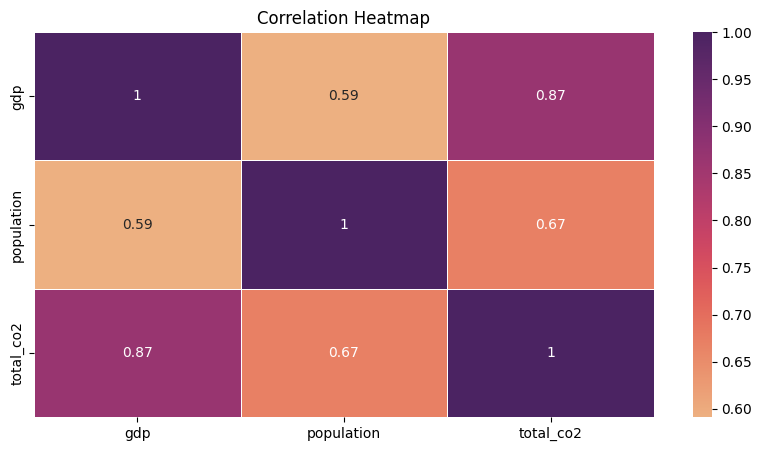

In [218]:
corr_gdp_carbon_emissions_heatmap_graph = plt.figure(figsize = (10, 5))
sns.heatmap(corr_gdp_carbon_emissions, linewidths = 0.5, annot = True, cmap = "flare")
plt.title("Correlation Heatmap", size = 12)

There is a strong positive correlation between total CO<sub>2</sub> emissions and the gdp of a country. 

There is a moderate positive correlation between total CO<sub>2</sub> emission and population.

### **Correlation between carbon emission sources and total CO<sub>2</sub> emissions**

In [178]:
feat = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2", "land_use_change_co2", "total_co2"]

carbon_emission_feat = carbon_emission[feat]
carbon_emission_feat

,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2,total_co2
0,0.043,0.359,0.304,0.440,0.747,0.0,6.265,1.894
1,0.046,0.191,0.366,0.300,0.627,0.0,6.046,1.530
2,0.067,0.311,0.223,0.333,0.702,0.0,4.983,1.635
3,0.070,0.305,0.367,0.400,0.771,0.0,4.617,1.913
4,0.069,0.399,0.304,0.475,0.874,0.0,4.140,2.121
...,...,...,...,...,...,...,...,...
13188,0.469,5.900,0.000,0.000,3.227,0.0,9.490,9.596
13189,0.558,7.178,0.000,0.000,4.060,0.0,8.830,11.795
13190,0.570,6.888,0.000,0.000,3.657,0.0,8.317,11.115
13191,0.570,6.722,0.000,0.000,3.317,0.0,7.878,10.608


In [179]:
corr_emissions_sources = carbon_emission_feat.corr(method = "pearson", min_periods=1)
corr_emissions_sources

,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,land_use_change_co2,total_co2
cement_co2,1.000000,0.934176,0.083631,0.263522,0.424982,0.913285,0.183880,0.781503
coal_co2,0.934176,1.000000,0.195044,0.479874,0.643039,0.933727,0.215342,0.925070
flaring_co2,0.083631,0.195044,1.000000,0.602031,0.478885,0.159396,0.145500,0.387449
gas_co2,0.263522,0.479874,0.602031,1.000000,0.894589,0.368216,0.110521,0.761734
oil_co2,0.424982,0.643039,0.478885,0.894589,1.000000,0.496466,0.195953,0.879044
other_industry_co2,0.913285,0.933727,0.159396,0.368216,0.496466,1.000000,0.259787,0.819947
land_use_change_co2,0.183880,0.215342,0.145500,0.110521,0.195953,0.259787,1.000000,0.219763
total_co2,0.781503,0.925070,0.387449,0.761734,0.879044,0.819947,0.219763,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

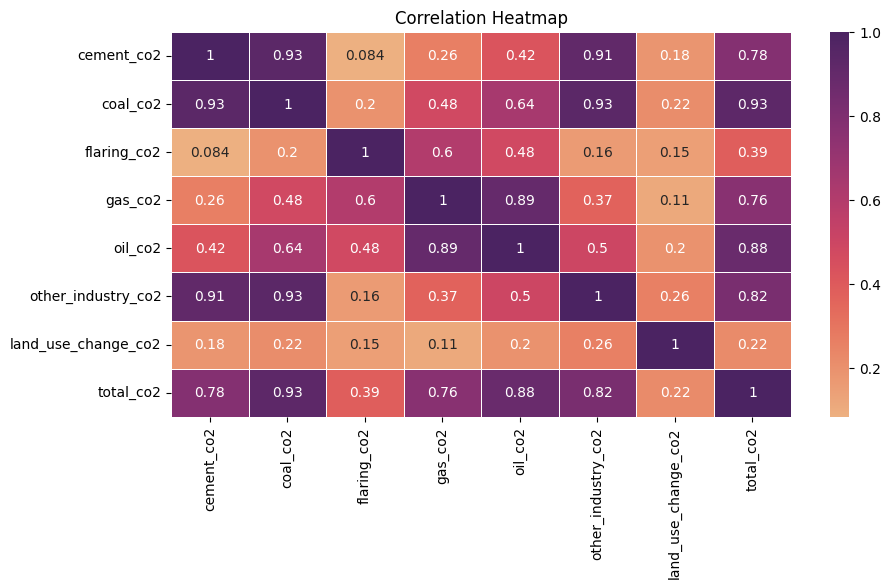

In [180]:
correlation_2_heatmap_graph = plt.figure(figsize = (10, 5))
sns.heatmap(corr_emissions_sources, linewidths = 0.5, annot = True, cmap = "flare")
plt.title("Correlation Heatmap", size = 12)

There is a super strong positive correlation between coal emission and total CO<sub>2</sub> emissions.

There is a strong positive correlation between oil, other industries, cement and gas and total CO<sub>2</sub> emissions.

There is a weak positive correlation between flaring and land use change and total CO<sub>2</sub> emissions.

## Insights

The main goal of this project is to explore the CO<sub>2</sub> dataset to find insightful data on carbon dioxide emissions, their evolution over the last 50 years and the factors influencing them.

* __2021 the year with the highest CO<sub>2</sub> emissions__

Through this analysis, it was found that carbon dioxide emissions have been increasing over the last 50 years, with the year 2021 being the year of the highest CO<sub>2</sub> emissions. 

* __Asia was the continent that emitted most CO<sub>2</sub>__

The continent that has produced the most CO<sub>2</sub> emissions over the last 50 years has been Asia, followed by Europe and North America. Since 1990, Europe has decreased its CO<sub>2</sub>  emissions, while North America has kept them stable and Asia has increased them dramatically. For this reason, Asia is the continent with the highest carbon dioxide emissions. Before 1990, Europe was the continent that emitted the most CO<sub>2</sub>.

* __The U.S. is the country that has emitted the most CO<sub>2</sub> in the last 50 years.__

The United States is the country that has emitted the most CO<sub>2</sub> in the last 50 years. While the U.S. has decreased its emission since 2008, China, on the contrary, has exponentially increased its emissions, becoming the top CO<sub>2</sub> emitter in 2021. On the other hand, Germany has been slowly decreasing its emission since 1990 to reach its lowest point in 2020.

* __Coal is the main source of CO<sub>2</sub> emissions__

Coal is the main source of CO<sub>2</sub> emissions, followed by oil and gas. Since 2000, coal emissions have increased dramatically. This is due to increased emissions in China, which mainly uses coal as fuel. 

The main source of CO<sub>2</sub> emissions in the United States is oil and coal, while in China it is mainly coal, followed by a high amount of emissions from land use change. This is easily explained by the country's development and the deforestation and construction of new cities. Germany, as well as the United States, emits CO<sub>2</sub> mainly through coal and oil. It should not be forgotten that land use change in Germany is negative, which means that CO<sub>2</sub> from the atmosphere is captured and removed, thus reducing the amount of CO<sub>2</sub> in the atmosphere.

* __Land use change emissions__

Land plays an important role in the global cycles of greenhouse gases such as carbon dioxide. Land use activities can lead to emissions of carbon dioxide into the atmosphere or its removal from the atmosphere. Positive emissions mean that carbon dioxide is emitted into the atmosphere, while negative emissions mean that carbon dioxide is captured and removed from the atmosphere.

The countries that contributed positively, i.e., emitted CO<sub>2</sub> into the atmosphere, through land use change were Brazil, Indonesia and China. On the other hand, the countries that contributed negatively, i.e. removed CO<sub>2</sub> from the atmosphere, were Italy, Poland and France. This is due to environmental policies in the European Union and the commitment to reduce carbon dioxide emissions into the atmosphere. 

* __GDP and population correlations__

During this study it was found that GDP has a strong positive correlation with total CO<sub>2</sub> emissions. Also, population has a moderate correlation with CO<sub>2</sub> total emissions.

* __Sources of CO<sub>2</sub> emissions correlations__

During this study it was found that coal, oil, gas, and other industries have a high correlation with the total emission of CO<sub>2</sub>.